In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.7 MB/s eta 0:00:00


In [ ]:
# STEP 1: IMPORT LIBRARIES AND LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
print("="*80)
print("CREDIT CARD FRAUD DETECTION - MODEL DEVELOPMENT")
print("="*80)

CREDIT CARD FRAUD DETECTION - MODEL DEVELOPMENT


In [ ]:
# Load the processed dataset
df = pd.read_csv('/content/creditcard_processed.csv')

In [ ]:
print("\n--- DATA LOADED SUCCESSFULLY ---")
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())


--- DATA LOADED SUCCESSFULLY ---
Dataset Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0

In [ ]:
# STEP 2: DATA PREPARATION AND CLEANING
print("\n" + "="*80)
print("STEP 2: DATA PREPARATION")
print("="*80)



STEP 2: DATA PREPARATION


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


In [ ]:
# Remove missing values if any
df = df.dropna()

In [ ]:
# Remove duplicates
duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
print(f"\nDuplicates Removed: {duplicates_before}")
print(f"Dataset Shape After Cleaning: {df.shape}")


Duplicates Removed: 1081
Dataset Shape After Cleaning: (283726, 31)


In [ ]:
# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())
print("\nClass Distribution (%):")
print(df['Class'].value_counts(normalize=True) * 100)


Class Distribution:
Class
0    283253
1       473
Name: count, dtype: int64

Class Distribution (%):
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


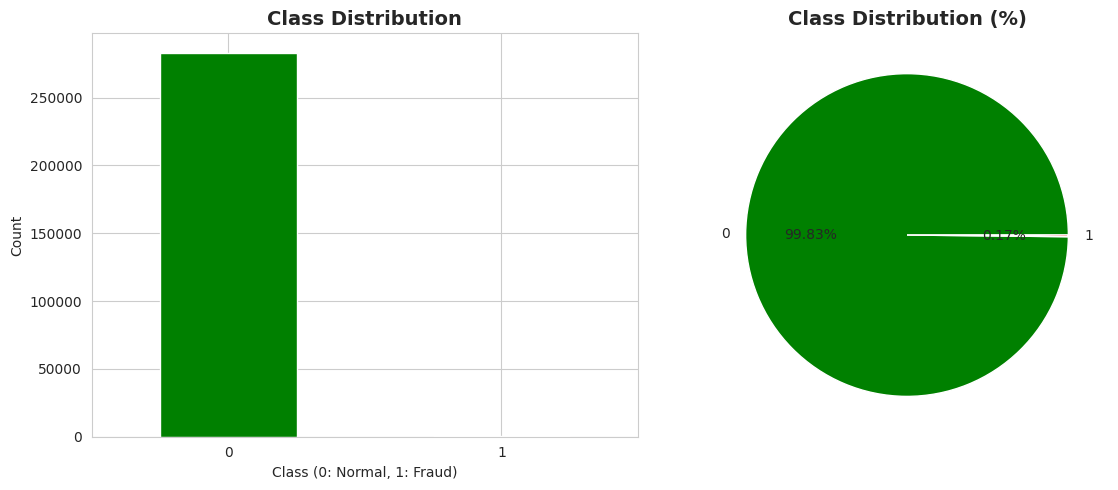

In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Class'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['green', 'red'])
plt.title('Class Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# STEP 3: FEATURE SELECTION AND PREPARATION
print("\n" + "="*80)
print("STEP 3: FEATURE SELECTION")
print("="*80)


STEP 3: FEATURE SELECTION


In [ ]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
print(f"\nFeatures Shape: {X.shape}")
print(f"Target Shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")


Features Shape: (283726, 30)
Target Shape: (283726,)

Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
# Scale Amount and Time if not already scaled
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X['Time'] = scaler.fit_transform(X[['Time']])

print("\nFeatures scaled successfully")
print(f"\nAmount - Mean: {X['Amount'].mean():.4f}, Std: {X['Amount'].std():.4f}")
print(f"Time - Mean: {X['Time'].mean():.4f}, Std: {X['Time'].std():.4f}")


Features scaled successfully

Amount - Mean: -0.0000, Std: 1.0000
Time - Mean: 0.0000, Std: 1.0000


In [ ]:
# STEP 4: TRAIN-TEST SPLIT
print("\n" + "="*80)
print("STEP 4: TRAIN-TEST SPLIT")
print("="*80)



STEP 4: TRAIN-TEST SPLIT


In [ ]:
# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")
print(f"\nTraining Class Distribution:")
print(y_train.value_counts())
print(f"\nTesting Class Distribution:")
print(y_test.value_counts())


Training Set: (226980, 30)
Testing Set: (56746, 30)

Training Class Distribution:
Class
0    226602
1       378
Name: count, dtype: int64

Testing Class Distribution:
Class
0    56651
1       95
Name: count, dtype: int64


In [ ]:
# STEP 5: HANDLE CLASS IMBALANCE - SMOTE
print("\n" + "="*80)
print("STEP 5: HANDLING CLASS IMBALANCE WITH SMOTE")
print("="*80)

print("\nBefore SMOTE:")
print(f"Class 0: {(y_train == 0).sum()}")
print(f"Class 1: {(y_train == 1).sum()}")


STEP 5: HANDLING CLASS IMBALANCE WITH SMOTE

Before SMOTE:
Class 0: 226602
Class 1: 378


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(f"Class 0: {(y_train_smote == 0).sum()}")
print(f"Class 1: {(y_train_smote == 1).sum()}")
print(f"\nResampled Training Set Shape: {X_train_smote.shape}")


After SMOTE:
Class 0: 226602
Class 1: 226602

Resampled Training Set Shape: (453204, 30)


In [ ]:
# STEP 6: MODEL 1 - LOGISTIC REGRESSION
print("\n" + "="*80)
print("STEP 6: MODEL 1 - LOGISTIC REGRESSION")
print("="*80)


STEP 6: MODEL 1 - LOGISTIC REGRESSION


In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
print("\n--- LOGISTIC REGRESSION RESULTS ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)


--- LOGISTIC REGRESSION RESULTS ---

Accuracy: 0.9737
Precision: 0.0531
Recall: 0.8737
F1-Score: 0.1002
ROC-AUC: 0.9619

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746


Confusion Matrix:
[[55172  1479]
 [   12    83]]


In [ ]:
# Visualize Logistic Regression Results
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 36.72222222222221, 'Predicted')

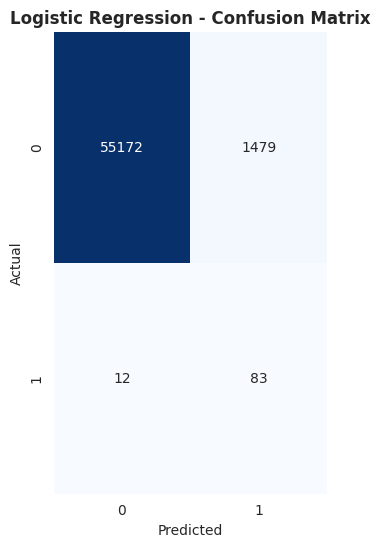

In [ ]:
# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression - Confusion Matrix', fontsize=12, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

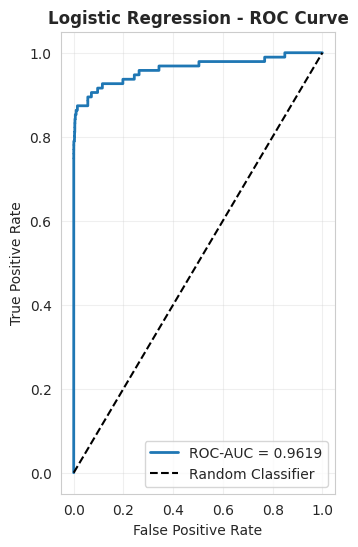

In [ ]:
# ROC Curve
plt.subplot(1, 3, 2)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'ROC-AUC = {roc_auc_score(y_test, y_pred_proba_lr):.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

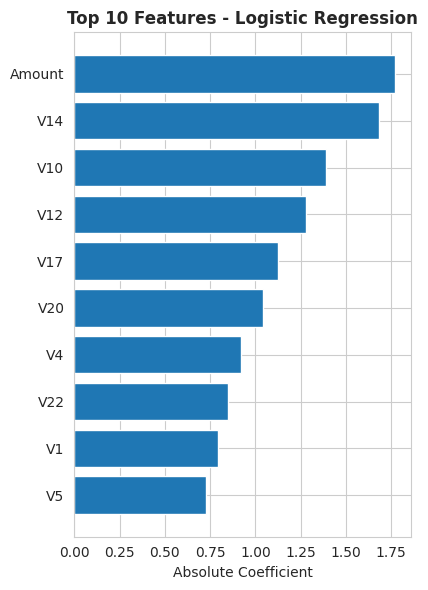

In [ ]:
# Feature Importance (Top 10)
plt.subplot(1, 3, 3)
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_[0])
}).sort_values('Importance', ascending=False).head(10)
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 10 Features - Logistic Regression', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# STEP 7: MODEL 2 - RANDOM FOREST
print("\n" + "="*80)
print("STEP 7: MODEL 2 - RANDOM FOREST CLASSIFIER")
print("="*80)


STEP 7: MODEL 2 - RANDOM FOREST CLASSIFIER


In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
print("\n--- RANDOM FOREST RESULTS ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


--- RANDOM FOREST RESULTS ---

Accuracy: 0.9995
Precision: 0.9114
Recall: 0.7579
F1-Score: 0.8276
ROC-AUC: 0.9494

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.76      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix:
[[56644     7]
 [   23    72]]


In [ ]:
# Visualize Random Forest Results
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 36.72222222222221, 'Predicted')

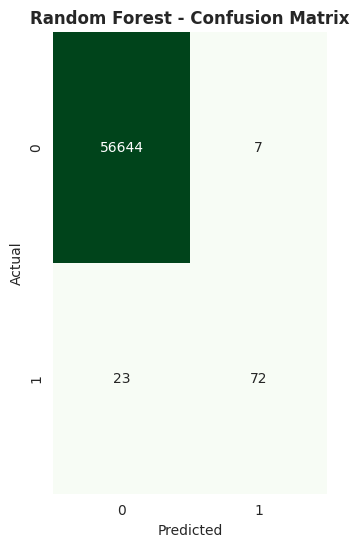

In [ ]:
# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest - Confusion Matrix', fontsize=12, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

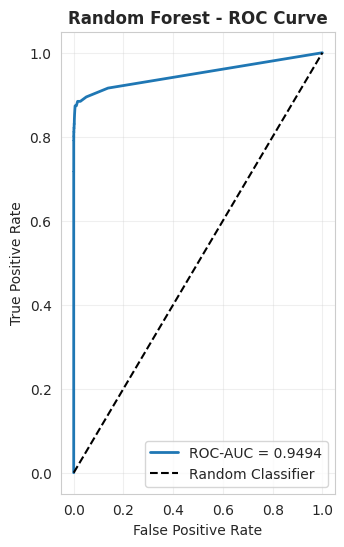

In [ ]:
# ROC Curve
plt.subplot(1, 3, 2)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'ROC-AUC = {roc_auc_score(y_test, y_pred_proba_rf):.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

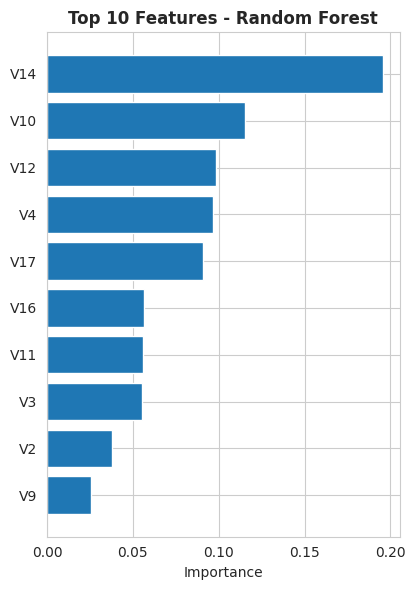

In [ ]:
# Feature Importance (Top 10)
plt.subplot(1, 3, 3)
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Features - Random Forest', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# STEP 8: MODEL COMPARISON
print("\n" + "="*80)
print("STEP 8: MODEL COMPARISON")
print("="*80)


STEP 8: MODEL COMPARISON


In [ ]:
# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_lr), roc_auc_score(y_test, y_pred_proba_rf)]
})

print("\n--- MODEL PERFORMANCE COMPARISON ---")
print(comparison.to_string(index=False))


--- MODEL PERFORMANCE COMPARISON ---
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.973725   0.053137 0.873684  0.100181 0.961850
      Random Forest  0.999471   0.911392 0.757895  0.827586 0.949355


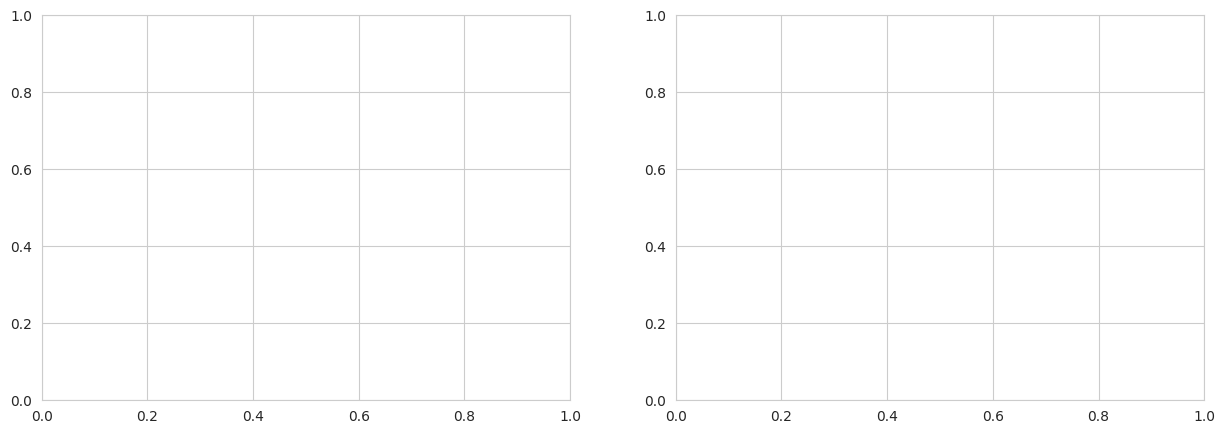

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

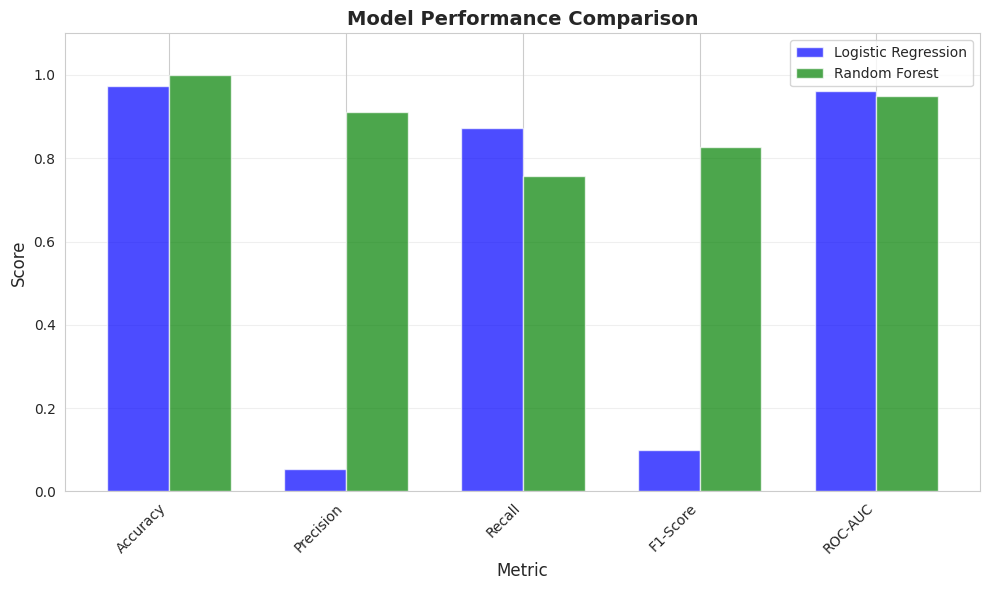

In [ ]:
# Bar plot comparison
plt.figure(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr),
    roc_auc_score(y_test, y_pred_proba_lr)
]
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_pred_proba_rf)
]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='blue', alpha=0.7)
plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='green', alpha=0.7)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.legend()
plt.ylim([0, 1.1])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

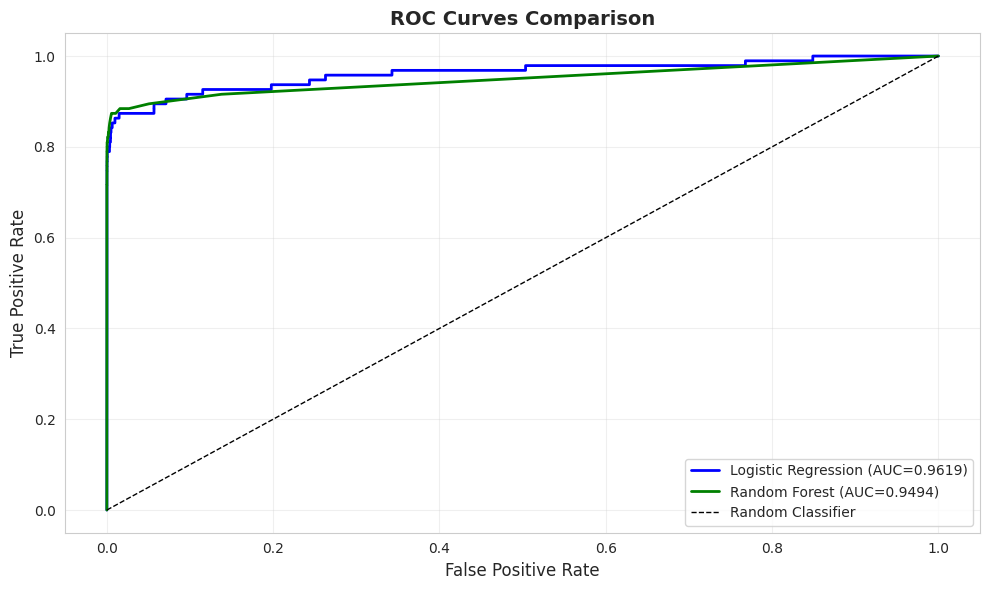

In [ ]:
# ROC Curves comparison
plt.figure(figsize=(10, 6))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, y_pred_proba_lr):.4f})', linewidth=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test, y_pred_proba_rf):.4f})', linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 9: FINAL SUMMARY
print("\n" + "="*80)
print("STEP 9: FINAL SUMMARY AND CONCLUSIONS")
print("="*80)

print("\n--- KEY FINDINGS ---")
print(f"\n1. Dataset: {df.shape[0]:,} transactions analyzed")
print(f"2. Class Imbalance: Addressed using SMOTE")
print(f"3. Models Developed: Logistic Regression & Random Forest")

print("\n--- BEST MODEL ---")
best_model_name = comparison.loc[comparison['F1-Score'].idxmax(), 'Model']
best_f1 = comparison['F1-Score'].max()
print(f"Best Performing Model: {best_model_name}")
print(f"F1-Score: {best_f1:.4f}")

print("\n--- BUSINESS RECOMMENDATIONS ---")
print("1. Deploy the best model for real-time fraud detection")
print("2. Set appropriate threshold based on business cost considerations")
print("3. Monitor model performance regularly and retrain as needed")
print("4. Investigate false positives to reduce customer friction")
print("5. Focus on high-value transactions for manual review")

print("\n" + "="*80)
print("MODEL DEVELOPMENT COMPLETE")
print("="*80)


STEP 9: FINAL SUMMARY AND CONCLUSIONS

--- KEY FINDINGS ---

1. Dataset: 283,726 transactions analyzed
2. Class Imbalance: Addressed using SMOTE
3. Models Developed: Logistic Regression & Random Forest

--- BEST MODEL ---
Best Performing Model: Random Forest
F1-Score: 0.8276

--- BUSINESS RECOMMENDATIONS ---
1. Deploy the best model for real-time fraud detection
2. Set appropriate threshold based on business cost considerations
3. Monitor model performance regularly and retrain as needed
4. Investigate false positives to reduce customer friction
5. Focus on high-value transactions for manual review

MODEL DEVELOPMENT COMPLETE
